In [67]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [ ]:
# using Rest API Metrix for Get the weekly commit activity got data for weeks adds and subs in
#  unixtimestamp convert to datetime using formula and then save it in csv file to get the graph
#E https://api.github.com/repos/neo4j/neo4j/stats/code_frequency
# convert uniex to datetime: (A2/86400)+Date(1970,1,1)

In [122]:
# Reads Data for Neo4j from 2019-2022
df = pd.read_csv('result_neo4j.csv')
df.head()

,Weeks,Adds,Subs,Date,NewDate
0,1546732800,29239,-26721,2019,2019-01-06
1,1547337600,82118,-77959,2019,2019-01-13
2,1547942400,146211,-143448,2019,2019-01-20
3,1548547200,18925,-27157,2019,2019-01-27
4,1549152000,12930,-10013,2019,2019-02-03


In [123]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Weeks    156 non-null    int64 
 1   Adds     156 non-null    int64 
 2   Subs     156 non-null    int64 
 3   Date     156 non-null    int64 
 4   NewDate  156 non-null    object
dtypes: int64(4), object(1)
memory usage: 6.2+ KB


In [124]:
import matplotlib.pyplot as plt
from matplotlib import dates as mpl_dates
import datetime
from datetime import datetime,timedelta
#from sklearn.linear_model import LinearRegression
import seaborn as sns
sns.set()

In [125]:
#Sum of Adds,Subs from 2019-2022
sum_of_cols=df.sum(axis=0)
print(sum_of_cols)

Weeks                                           248602348800
Adds                                                 2104467
Subs                                                -1667137
Date                                                  315120
NewDate    2019-01-062019-01-132019-01-202019-01-272019-0...
dtype: object


In [126]:
import matplotlib.pyplot as plt
#from sklearn.linear_model import LinearRegression
import seaborn as sns
sns.set()

In [127]:
name_and_year = df.groupby(['Weeks','Date'])
sum_counts = name_and_year['Adds'].sum().reset_index().sort_values('Adds', ascending=False)
sum_counts.head(25)

,Weeks,Date,Adds
2,1547942400,2019,146211
8,1551571200,2019,117110
1,1547337600,2019,82118
11,1553385600,2019,52630
47,1575158400,2019,52442
31,1565481600,2019,50436
7,1550966400,2019,46140
19,1558224000,2019,40347
48,1575763200,2019,39599
68,1587859200,2020,33376


In [128]:
names_and_years = df.groupby(['Weeks','NewDate'])
sum_counts = names_and_years['Adds'].sum().reset_index().sort_values('Adds', ascending=False)
sum_counts.head(25)

,Weeks,NewDate,Adds
2,1547942400,2019-01-20,146211
8,1551571200,2019-03-03,117110
1,1547337600,2019-01-13,82118
11,1553385600,2019-03-24,52630
47,1575158400,2019-12-01,52442
31,1565481600,2019-08-11,50436
7,1550966400,2019-02-24,46140
19,1558224000,2019-05-19,40347
48,1575763200,2019-12-08,39599
68,1587859200,2020-04-26,33376


In [129]:
pr_by_year_neo4j = df.groupby(['Adds'])['Date'].sum().reset_index().sort_values('Adds', ascending=False)
pr_by_year_neo4j.head(10)

,Adds,Date
154,146211,2019
153,117110,2019
152,82118,2019
151,52630,2019
150,52442,2019
149,50436,2019
148,46140,2019
147,40347,2019
146,39599,2019
145,33376,2020


In [104]:
#GRAPH FOR Neo4j from 2019-2022
#add commit values

Text(0.5, 0, 'Date')

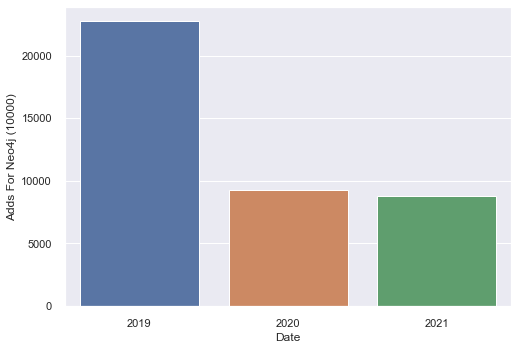

In [130]:
plot_annual_pr = sns.barplot(data=pr_by_year_neo4j.query('Date < 2022 & Date > 2018'),x='Date',y='Adds',ci=None)
plot_annual_pr.set_ylabel('Adds For Neo4j (10000)')
plot_annual_pr.set_xlabel('Date')

In [131]:
df['NewDate']=pd.to_datetime(df['NewDate'])
print(df)
print()
print(df.dtypes)

          Weeks    Adds    Subs  Date    NewDate
0    1546732800   29239  -26721  2019 2019-01-06
1    1547337600   82118  -77959  2019 2019-01-13
2    1547942400  146211 -143448  2019 2019-01-20
3    1548547200   18925  -27157  2019 2019-01-27
4    1549152000   12930  -10013  2019 2019-02-03
..          ...     ...     ...   ...        ...
151  1638057600    1664    -249  2021 2021-11-28
152  1638662400     376    -203  2021 2021-12-05
153  1639267200     714    -314  2021 2021-12-12
154  1639872000      57     -22  2021 2021-12-19
155  1640476800      25      -4  2021 2021-12-26

[156 rows x 5 columns]

Weeks               int64
Adds                int64
Subs                int64
Date                int64
NewDate    datetime64[ns]
dtype: object


In [132]:
df['NewDate']=pd.to_datetime(df['NewDate'],format='%Y-%m-%d %I-%p')

In [133]:
commit_date= df['NewDate']
Adds_repo= df['Adds']

<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

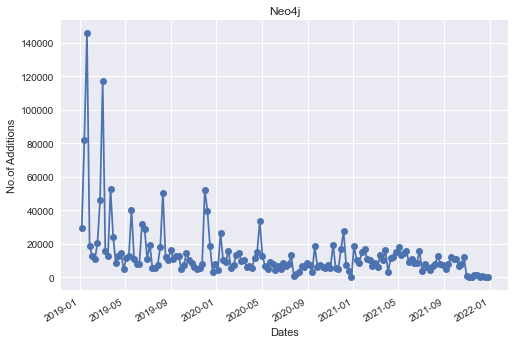

In [135]:
plt.style.use('seaborn')
plt.plot_date(commit_date,Adds_repo,linestyle='solid')
plt.gcf().autofmt_xdate()
plt.title('Neo4j')
plt.xlabel('Dates')
plt.ylabel('No.of Additions')
plt.tight_layout

In [137]:
df = pd.read_csv('Apache.csv')
df.head()

,Weeks,Adds,Subs,Date,Year
0,1546732800,4342,-3512,06/01/2019,2019
1,1547337600,5616,-2394,13/01/2019,2019
2,1547942400,6256,-3377,20/01/2019,2019
3,1548547200,5803,-3201,27/01/2019,2019
4,1549152000,652,-322,03/02/2019,2019


In [138]:
sum_of_cols=df.sum(axis=0)
print(sum_of_cols)

Weeks                                         248602348800
Adds                                               2117224
Subs                                              -1361910
Date     06/01/201913/01/201920/01/201927/01/201903/02/...
Year                                                315120
dtype: object


In [139]:
Adds_by_year_Apache = df.groupby(['Adds'])['Year'].sum().reset_index().sort_values('Adds', ascending=False)
Adds_by_year_Apache.head(10)

,Adds,Year
154,151028,2019
153,139743,2019
152,134625,2020
151,84550,2021
150,81409,2020
149,79610,2021
148,74234,2019
147,71619,2019
146,66760,2021
145,62915,2021


In [14]:
#GRAPH FOR Apache 2019-2022 
#https://api.github.com/repos/Apache/Spark/stats/code_frequency

Text(0.5, 0, 'Year')

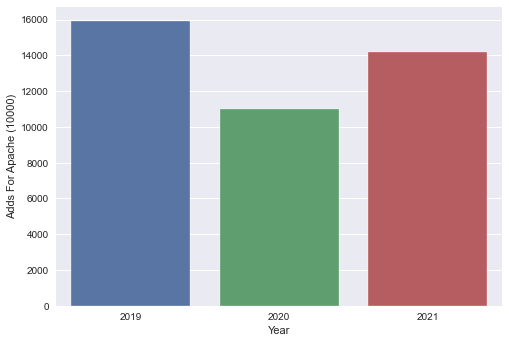

In [140]:
plot_annual_pr = sns.barplot(data=Adds_by_year_Apache.query('Year < 2022 & Year > 2018'),x='Year',y='Adds',ci=None)
plot_annual_pr.set_ylabel('Adds For Apache (10000)')
plot_annual_pr.set_xlabel('Year')

In [141]:
df['Date']=pd.to_datetime(df['Date'])
print(df)
print()
print(df.dtypes)

          Weeks   Adds   Subs       Date  Year
0    1546732800   4342  -3512 2019-06-01  2019
1    1547337600   5616  -2394 2019-01-13  2019
2    1547942400   6256  -3377 2019-01-20  2019
3    1548547200   5803  -3201 2019-01-27  2019
4    1549152000    652   -322 2019-03-02  2019
..          ...    ...    ...        ...   ...
151  1638057600   5688  -2885 2021-11-28  2021
152  1638662400   3039  -1350 2021-05-12  2021
153  1639267200  10179  -3067 2021-12-12  2021
154  1639872000   2924  -2945 2021-12-19  2021
155  1640476800  16020 -13359 2021-12-26  2021

[156 rows x 5 columns]

Weeks             int64
Adds              int64
Subs              int64
Date     datetime64[ns]
Year              int64
dtype: object


C:\Users\Jahnavi Jaitly\AppData\Local\Temp\ipykernel_1840\1437625883.py:1: UserWarning: Parsing '13/01/2019' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['Date']=pd.to_datetime(df['Date'])
C:\Users\Jahnavi Jaitly\AppData\Local\Temp\ipykernel_1840\1437625883.py:1: UserWarning: Parsing '20/01/2019' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['Date']=pd.to_datetime(df['Date'])
C:\Users\Jahnavi Jaitly\AppData\Local\Temp\ipykernel_1840\1437625883.py:1: UserWarning: Parsing '27/01/2019' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['Date']=pd.to_datetime(df['Date'])
C:\Users\Jahnavi Jaitly\AppData\Local\Temp\ipykernel_1840\1437625883.py:1: UserWarning: Parsing '17/02/2019' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['Date']=pd.to_datetime(df['Date'])
C:\Users

In [142]:
df['Date']=pd.to_datetime(df['Date'],format='%Y-%m-%d %I-%p')

In [143]:
commit_date_Apache= df['Date']
Adds_repo_Apache= df['Adds']

<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

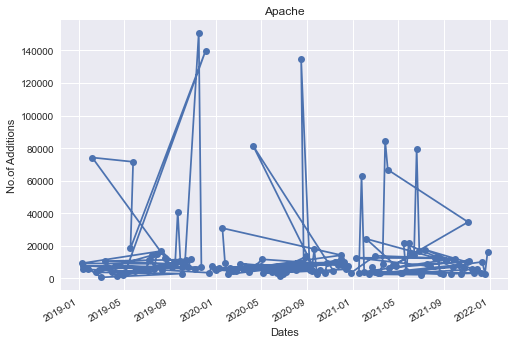

In [144]:
plt.style.use('seaborn')
plt.plot_date(commit_date_Apache,Adds_repo_Apache,linestyle='solid')
plt.gcf().autofmt_xdate()
plt.title('Apache')
plt.xlabel('Dates')
plt.ylabel('No.of Additions')
plt.tight_layout

In [145]:
df = pd.read_csv('Linux.csv')
df.head()

,Weeks,Adds,Subs,Year,Date
0,1546732800,41328,-24154,2019,2019-01-06
1,1547337600,62289,-62185,2019,2019-01-13
2,1547942400,93915,-43697,2019,2019-01-20
3,1548547200,68611,-35970,2019,2019-01-27
4,1549152000,74541,-35071,2019,2019-02-03


In [146]:
sum_of_cols=df.sum(axis=0)
print(sum_of_cols)

Weeks                                         268335244800
Adds                                              14564439
Subs                                              -7789296
Year                                                339384
Date     2019-01-062019-01-132019-01-202019-01-272019-0...
dtype: object


In [147]:
Adds_by_year_Linux = df.groupby(['Adds'])['Year'].sum().reset_index().sort_values('Adds', ascending=False)
Adds_by_year_Linux.head(10)

,Adds,Year
166,477374,2022
165,407483,2019
164,372505,2020
163,352536,2019
162,297996,2020
161,293996,2020
160,278217,2020
159,209163,2019
158,204571,2021
157,202705,2019


In [19]:
#GRAPH FOR Linux

Text(0.5, 0, 'Year')

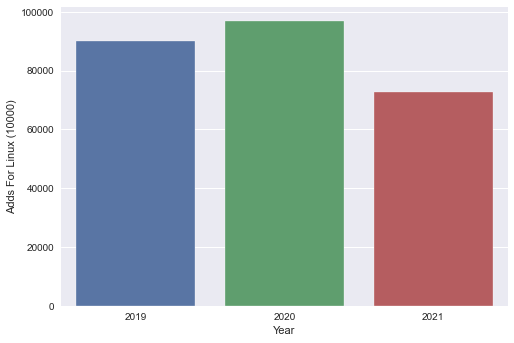

In [148]:
plot_annual_pr = sns.barplot(data=Adds_by_year_Linux.query('Year < 2022 & Year > 2018'),x='Year',y='Adds',ci=None)
plot_annual_pr.set_ylabel('Adds For Linux (10000)')
plot_annual_pr.set_xlabel('Year')

In [149]:
df['Date']=pd.to_datetime(df['Date'])
print(df)
print()
print(df.dtypes)

          Weeks    Adds    Subs  Year       Date
0    1546732800   41328  -24154  2019 2019-01-06
1    1547337600   62289  -62185  2019 2019-01-13
2    1547942400   93915  -43697  2019 2019-01-20
3    1548547200   68611  -35970  2019 2019-01-27
4    1549152000   74541  -35071  2019 2019-02-03
..          ...     ...     ...   ...        ...
163  1645315200   88884  -40564  2022 2022-02-20
164  1645920000   37003  -33480  2022 2022-02-27
165  1646524800   77880  -57954  2022 2022-03-06
166  1647129600  183368 -169923  2022 2022-03-13
167  1647734400   15944   -8091  2022 2022-03-20

[168 rows x 5 columns]

Weeks             int64
Adds              int64
Subs              int64
Year              int64
Date     datetime64[ns]
dtype: object


In [150]:
commit_date_Linux= df['Date']
Adds_repo_Linux= df['Adds']

<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

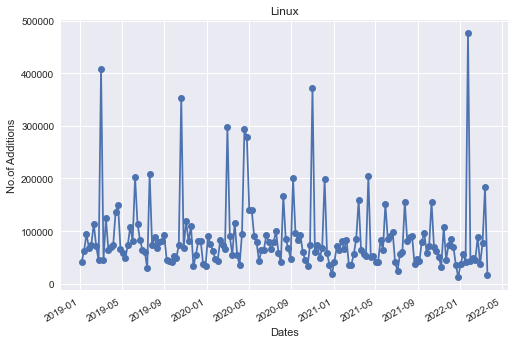

In [151]:
plt.style.use('seaborn')
plt.plot_date(commit_date_Linux,Adds_repo_Linux,linestyle='solid')
plt.gcf().autofmt_xdate()
plt.title('Linux')
plt.xlabel('Dates')
plt.ylabel('No.of Additions')
plt.tight_layout

In [53]:
df = pd.read_csv('Microsoft_ui_xaml.csv')
df.head()

,Adds,Subs,Year
0,365,0,2018
1,99,-1,2018
2,0,0,2018
3,0,0,2018
4,0,0,2018


In [54]:
sum_of_cols=df.sum(axis=0)
print(sum_of_cols)

Adds    1661189
Subs    -896010
Year     383772
dtype: int64


In [55]:
Adds_by_year_Mic = df.groupby(['Adds'])['Year'].sum().reset_index().sort_values('Adds', ascending=False)
Adds_by_year_Mic.head(10)

,Adds,Year
170,353968,2018
169,110881,2020
168,88898,2021
167,71723,2021
166,71342,2020
165,69577,2021
164,63766,2021
163,60793,2020
162,46751,2019
161,46288,2021


Text(0.5, 0, 'Year')

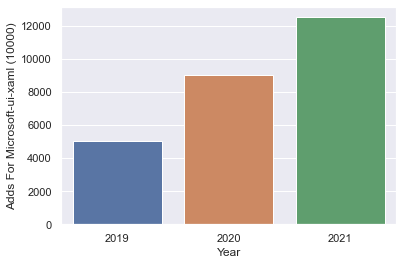

In [56]:
plot_annual_pr = sns.barplot(data=Adds_by_year_Mic.query('Year < 2022 & Year > 2018'),x='Year',y='Adds',ci=None)
plot_annual_pr.set_ylabel('Adds For Microsoft-ui-xaml (10000)')
plot_annual_pr.set_xlabel('Year')

In [161]:
df['Date']=pd.to_datetime(df['Date'])
print(df)
print()
print(df.dtypes)

           Week    Adds    Subs  Year       Date
0    1546732800    1047    -647  2019 2019-01-06
1    1547337600   13320  -11079  2019 2019-01-13
2    1547942400    3383   -1545  2019 2019-01-20
3    1548547200    2111   -1030  2019 2019-01-27
4    1549152000    4918   -3929  2019 2019-02-03
..          ...     ...     ...   ...        ...
163  1645315200    1850  -48447  2022 2022-02-20
164  1645920000  179059 -177813  2022 2022-02-27
165  1646524800    2407   -2408  2022 2022-03-06
166  1647129600    2815   -2207  2022 2022-03-13
167  1647734400    4996   -2368  2022 2022-03-20

[168 rows x 5 columns]

Week             int64
Adds             int64
Subs             int64
Year             int64
Date    datetime64[ns]
dtype: object


In [162]:
commit_date_microsoft= df['Date']
Adds_repo_microsoft= df['Adds']

<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

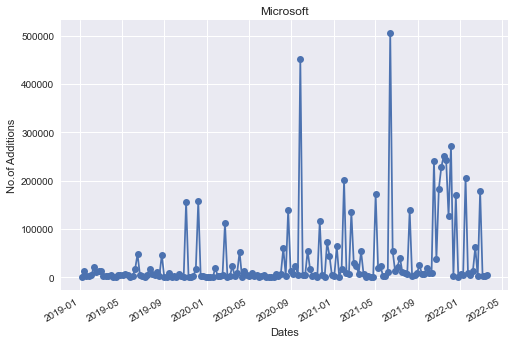

In [164]:
plt.style.use('seaborn')
plt.plot_date(commit_date_microsoft,Adds_repo_microsoft,linestyle='solid')
plt.gcf().autofmt_xdate()
plt.title('Microsoft')
plt.xlabel('Dates')
plt.ylabel('No.of Additions')
plt.tight_layout

In [152]:
df = pd.read_csv('freeCodeCamp.csv')
df.head()

,Week,Adds,Subs,Year,Date
0,1546732800,1047,-647,2019,2019-01-06
1,1547337600,13320,-11079,2019,2019-01-13
2,1547942400,3383,-1545,2019,2019-01-20
3,1548547200,2111,-1030,2019,2019-01-27
4,1549152000,4918,-3929,2019,2019-02-03


In [153]:
sum_of_cols=df.sum(axis=0)
print(sum_of_cols)

Week                                         268335244800
Adds                                              5956953
Subs                                             -5893764
Year                                               339384
Date    2019-01-062019-01-132019-01-202019-01-272019-0...
dtype: object


In [154]:
Adds_by_year_freecamp = df.groupby(['Adds'])['Year'].sum().reset_index().sort_values('Adds', ascending=False)
Adds_by_year_freecamp.head(10)

,Adds,Year
166,506437,2021
165,450713,2020
164,271850,2021
163,251109,2021
162,243169,2021
161,241257,2021
160,227302,2021
159,206146,2022
158,200852,2021
157,182931,2021


Text(0.5, 0, 'Year')

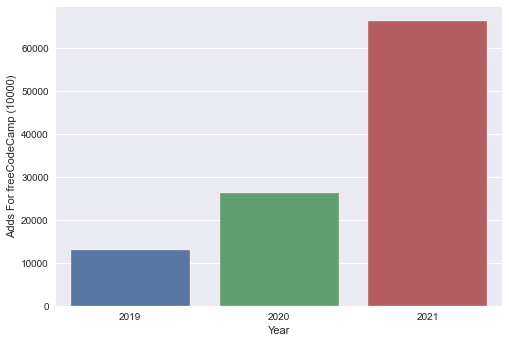

In [156]:
plot_annual_pr = sns.barplot(data=Adds_by_year_freecamp.query('Year < 2022 & Year > 2018'),x='Year',y='Adds',ci=None)
plot_annual_pr.set_ylabel('Adds For freeCodeCamp (10000)')
plot_annual_pr.set_xlabel('Year')

In [157]:
df['Date']=pd.to_datetime(df['Date'])
print(df)
print()
print(df.dtypes)

           Week    Adds    Subs  Year       Date
0    1546732800    1047    -647  2019 2019-01-06
1    1547337600   13320  -11079  2019 2019-01-13
2    1547942400    3383   -1545  2019 2019-01-20
3    1548547200    2111   -1030  2019 2019-01-27
4    1549152000    4918   -3929  2019 2019-02-03
..          ...     ...     ...   ...        ...
163  1645315200    1850  -48447  2022 2022-02-20
164  1645920000  179059 -177813  2022 2022-02-27
165  1646524800    2407   -2408  2022 2022-03-06
166  1647129600    2815   -2207  2022 2022-03-13
167  1647734400    4996   -2368  2022 2022-03-20

[168 rows x 5 columns]

Week             int64
Adds             int64
Subs             int64
Year             int64
Date    datetime64[ns]
dtype: object


In [158]:
commit_date_freecode= df['Date']
Adds_repo_freecode= df['Adds']

<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

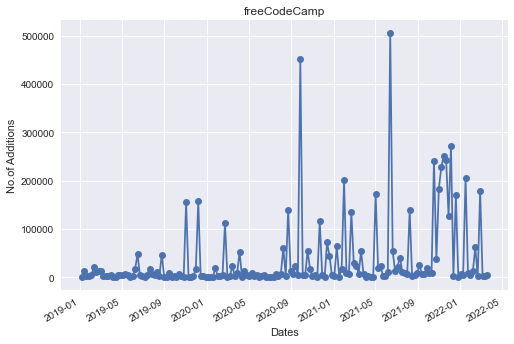

In [160]:
plt.style.use('seaborn')
plt.plot_date(commit_date_freecode,Adds_repo_freecode,linestyle='solid')
plt.gcf().autofmt_xdate()
plt.title('freeCodeCamp')
plt.xlabel('Dates')
plt.ylabel('No.of Additions')
plt.tight_layout